In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("C:/Users/admin/Desktop/PROJECT -1/Housing.csv")
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [32]:
for columns in df.columns:
    print(df[columns].value_counts())
    print("*"*20)

900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64
********************
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64
********************
2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64
********************
Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64
********************
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                   

## Cleaning the Dataset
#### 1) Removing Empty Rows .
#### 2) Handling the Missing Values by finding the median. 
#### 3) Removing the Outliers.
#### 4) Removing the Unnecessary Columns 

In [33]:
columns = {'Furnishing','Parking','Status','Transaction','Type'}
df.drop(columns,inplace = True,axis=1)
empty = df.isna().sum()
print(empty)  # only per sqft has missing values more then 240.

Area          0
BHK           0
Bathroom      2
Locality      0
Price         0
Per_Sqft    241
dtype: int64


### Handling the Missing Values.
##### by finding the median of per_sqft column and we will fill it in the values that are missing. 

##### median of per_sqft column was (11291.5) and we filled the missing values with it.

In [34]:
## HANDLED THE MISSING VALUES.

df['Per_Sqft'].median()
df['Per_Sqft'].fillna(11291.5,inplace=True) 
df['Bathroom'].median()
df['Bathroom'].fillna(2,inplace=True)

### Special Case : Now, the dataset is completely cleaned it has zero missing values but there is one issue in the Locality Column as it has large addresses for no reason that we have to solve we will use str.split().

In [35]:
# Handled the Special case as well.

df['Locality'] = df['Locality'].str.split().str[:7].str.join(' ')
df['Locality'].head(20)

0                           Rohini Sector 25
1     J R Designers Floors, Rohini Sector 24
2        Citizen Apartment, Rohini Sector 13
3                           Rohini Sector 24
4      Rohini Sector 24 carpet area 650 sqft
5                           Rohini Sector 24
6                           Rohini Sector 24
7              Delhi Homes, Rohini Sector 24
8                           Rohini Sector 21
9                           Rohini Sector 22
10                          Rohini Sector 20
11                          Rohini Sector 25
12                          Rohini Sector 24
13                          Rohini Sector 24
14    Rohini Sector 8 How Auctions work? The
15     Rohini Sector 25 carpet area 660 sqft
16                          Rohini Sector 22
17                          Rohini Sector 16
18                          Rohini Sector 14
19                          Rohini Sector 24
Name: Locality, dtype: object

In [36]:
df.loc[0,'Per_Sqft'] = 6667.0

In [37]:
df.head()

,Area,BHK,Bathroom,Locality,Price,Per_Sqft
0,800.0,3,2.0,Rohini Sector 25,6500000,6667.0
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft,6200000,6667.0


# First Step is Done 

## Analyzing the Data Now

In [38]:
print("DETAILS OF THE MOST EXPENSIVE HOUSE\n\n\n")

exp = df['Price'].max()
Most_Expensive = df[df['Price']==exp]
print("Most Expensive House Price  :   ",Most_Expensive['Price'].values[0])
print("Locality of That House : ",Most_Expensive['Locality'].values[0])
print("Area Per Sq_ft of the House : ",Most_Expensive['Per_Sqft'].values[0])
print("Total Area of that House : ",Most_Expensive['Area'].values[0])
print("BHK",Most_Expensive['BHK'].values[0])

print("\n\n\nDETAILS OF THE MOST CHEAP HOUSE\n\n\n")

exp = df['Price'].min()
cheap = df[df['Price']==exp]

print("The Price of the Cheapest House :  ",cheap['Price'].values[0])
print("Locality : ",cheap['Locality'].values[0])
print("Area Per Square Feet : ",cheap['Per_Sqft'].values[0])
print("Total Area : ",cheap['Area'].values[0])

DETAILS OF THE MOST EXPENSIVE HOUSE



Most Expensive House Price  :    240000000
Locality of That House :  Lajpat Nagar
Area Per Sq_ft of the House :  22000.0
Total Area of that House :  8000.0
BHK 4



DETAILS OF THE MOST CHEAP HOUSE



The Price of the Cheapest House :   1000000
Locality :  Narela Sector A5
Area Per Square Feet :  5051.0
Total Area :  198.0


In [39]:
df.describe()

,Area,BHK,Bathroom,Price,Per_Sqft
count,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,1466.452724,2.796664,2.555203,2.130670e+07,14844.468626
std,1568.055040,0.954425,1.041627,2.560115e+07,19082.601073
min,28.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,5.700000e+06,6714.000000
50%,1200.000000,3.000000,2.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.550000e+07,15459.000000
max,24300.000000,10.000000,7.000000,2.400000e+08,183333.000000


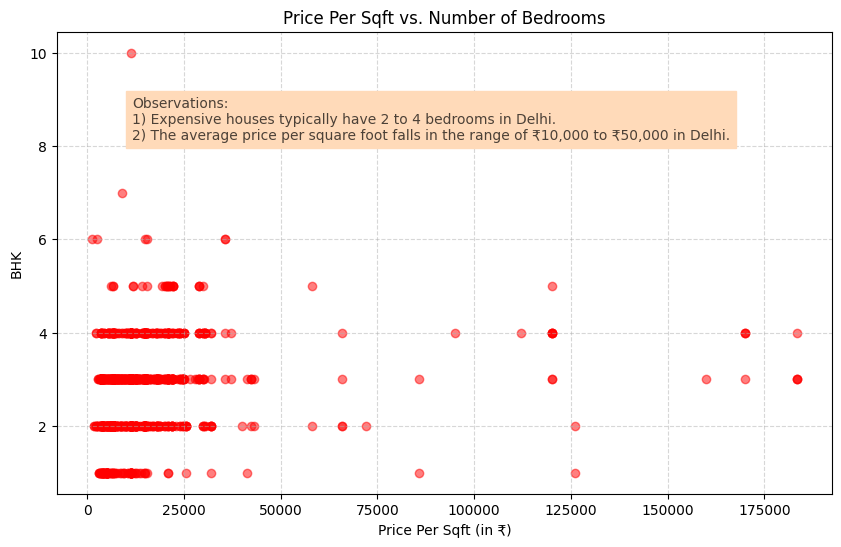

In [74]:
'''plt.scatter(df['Per_Sqft'],df['BHK'],alpha=0.5)
plt.xlabel('Per_Sqft')
plt.ylabel('BHK')
plt.title('Prices & BHK Scatter Plot')
plt.figtext(0.14,0.7,'1) Maximum Houses Resides Between 0 to 4 BHK in Delhi\n2) Maximum Expensive House are of 2 to 4 BHK in Delhi \n3) Average Per Square Feet Price is Between 10000 to 50000 in Delhi')
plt.show()'''
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size for better presentation
plt.scatter(df['Per_Sqft'], df['BHK'], alpha=0.5, color='red')

# Set labels and title
plt.xlabel('Price Per Sqft (in ₹)')
plt.ylabel('BHK')
plt.title('Price Per Sqft vs. Number of Bedrooms')

# Add improved information below the title
info_text = "Observations:\n\
1) Expensive houses typically have 2 to 4 bedrooms.\n\
2) The average price per square foot falls in the range of ₹10,000 to ₹50,000."
plt.figtext(0.2, 0.7, info_text, fontsize=10, backgroundcolor='peachpuff', alpha=0.7)
plt.savefig("C:/Users/admin/Desktop/1.jpg")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


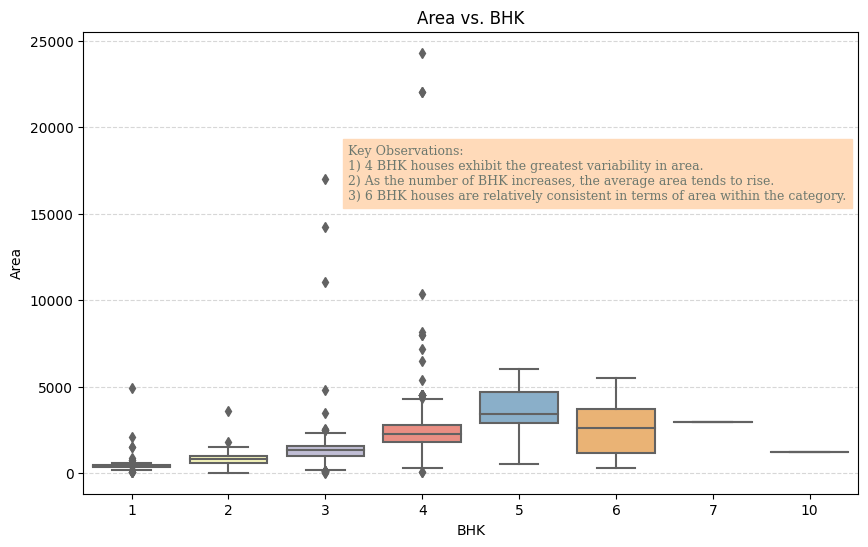

In [41]:
# Create a box plot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='BHK', y='Area', data=df, palette="Set3")  # You can choose a different color palette

# Add a title
plt.title("Area vs. BHK")

# Add improved information below the title
info_text = "Key Observations:\n\
1) 4 BHK houses exhibit the greatest variability in area.\n\
2) As the number of BHK increases, the average area tends to rise.\n\
3) 6 BHK houses are relatively consistent in terms of area within the category."

plt.figtext(0.39, 0.6, info_text, fontsize=9, backgroundcolor='peachpuff', alpha=0.7, color='darkslategray', family='serif')

plt.grid(axis='y', linestyle='--', alpha=0.5)
#plt.savefig("C:/Users/admin/Desktop/Area&BHK.jpg")
plt.show()

In [44]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Locality', 'Price', 'Per_Sqft'], dtype='object')

C:\Users\admin\AppData\Local\Temp\ipykernel_9424\2865535445.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='Blues')


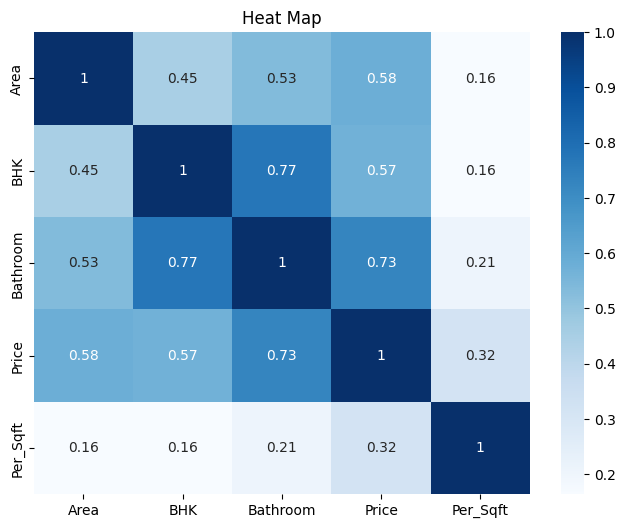

In [58]:
#HEATMAP
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(),annot=True, cmap='Blues')

plt.title('Heat Map')

plt.savefig("C:/Users/admin/Desktop/heat.jpg")

plt.show()

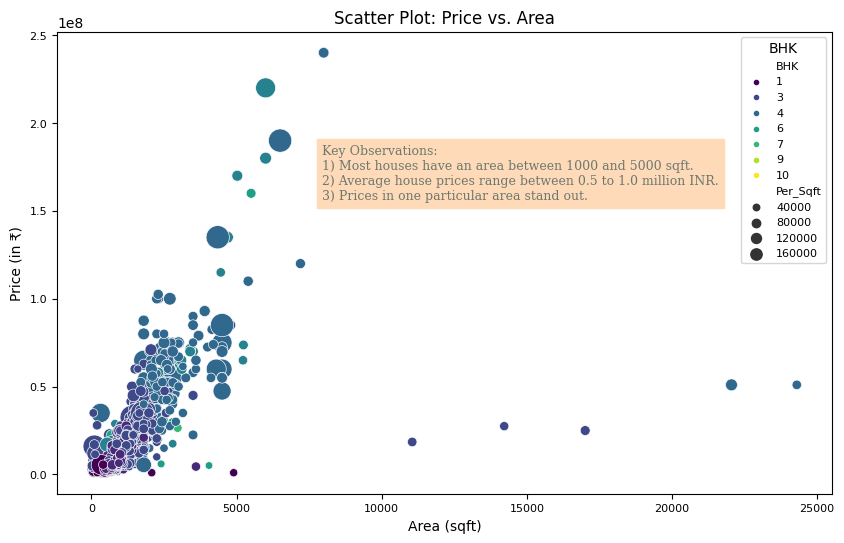

In [76]:
# Create a scatter plot with enhanced attributes
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Use color and size to represent additional attributes
sns.scatterplot(x='Area', y='Price', data=df, hue='BHK', size='Per_Sqft', sizes=(30, 300), palette='viridis', legend='brief')

# Add labels and a title
plt.xlabel('Area (sqft)')
plt.ylabel('Price (in ₹)')
plt.title('Scatter Plot: Price vs. Area')

# Additional Text
info_text = "Key Observations:\n\
1) Most houses have an area between 1000 and 5000 sqft.\n\
2) Average house prices range between 0.5 to 1.0 million INR.\n\
3) Prices in one particular area stand out."

# Add the info text with improved English
plt.figtext(0.39, 0.6, info_text, fontsize=9, backgroundcolor='peachpuff', alpha=0.7, color='darkslategray', family='serif')

# Customize the legend and labels
plt.legend(title='BHK', title_fontsize=10, loc='upper right', fontsize=8, markerscale=0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#plt.savefig("C:/Users/admin/Desktop/scatter.jpg")

# Show the plot
plt.show()